## R's system for Monte Carlo draws

Some of my favorite distributions:

In [ ]:
runif(10, 1, 6)

In [ ]:
rnorm(10, 2, 2)

In [ ]:
rexp(10, .1)

In [ ]:
rt(10, 10)

In [ ]:
rbeta(10, 2, 5)

Look at one of these as a histogram plot.

In [ ]:
hist(rexp(10, .1))

In [ ]:
hist(rexp(1000000, .1))

In [ ]:
library(ggplot2)
ggplot(data.frame(x=rexp(1000000, .1)), aes(x)) + geom_histogram()

In [ ]:
library(ggplot2)
ggplot(data.frame(x=rexp(1000000, .1)), aes(x)) + geom_histogram() + scale_y_log10()

## Convince ourselves of the central limit theorem

Each person take a distribution function. Let's set up the Central Limit Theorem!

Step 1. Take the average of N draws of a distribution.

In [ ]:
mean(rexp(10, .1))

Step 2. Do that many times.

In [ ]:
draws = c()
for (ii in 1:10000)
    draws = c(draws, mean(rexp(10, .1)))

Step 3. Plot it!

In [ ]:
hist(draws)

Step 4. Try it again with more averaging.

In [ ]:
draws = c()
for (ii in 1:10000)
    draws = c(draws, mean(rexp(10000, .1)))
hist(draws)

## Long tails

Look at the normal distribution and the cauchy distribution.

Normal distribution:

$X = \frac{1}{n} \sum_i X_i$

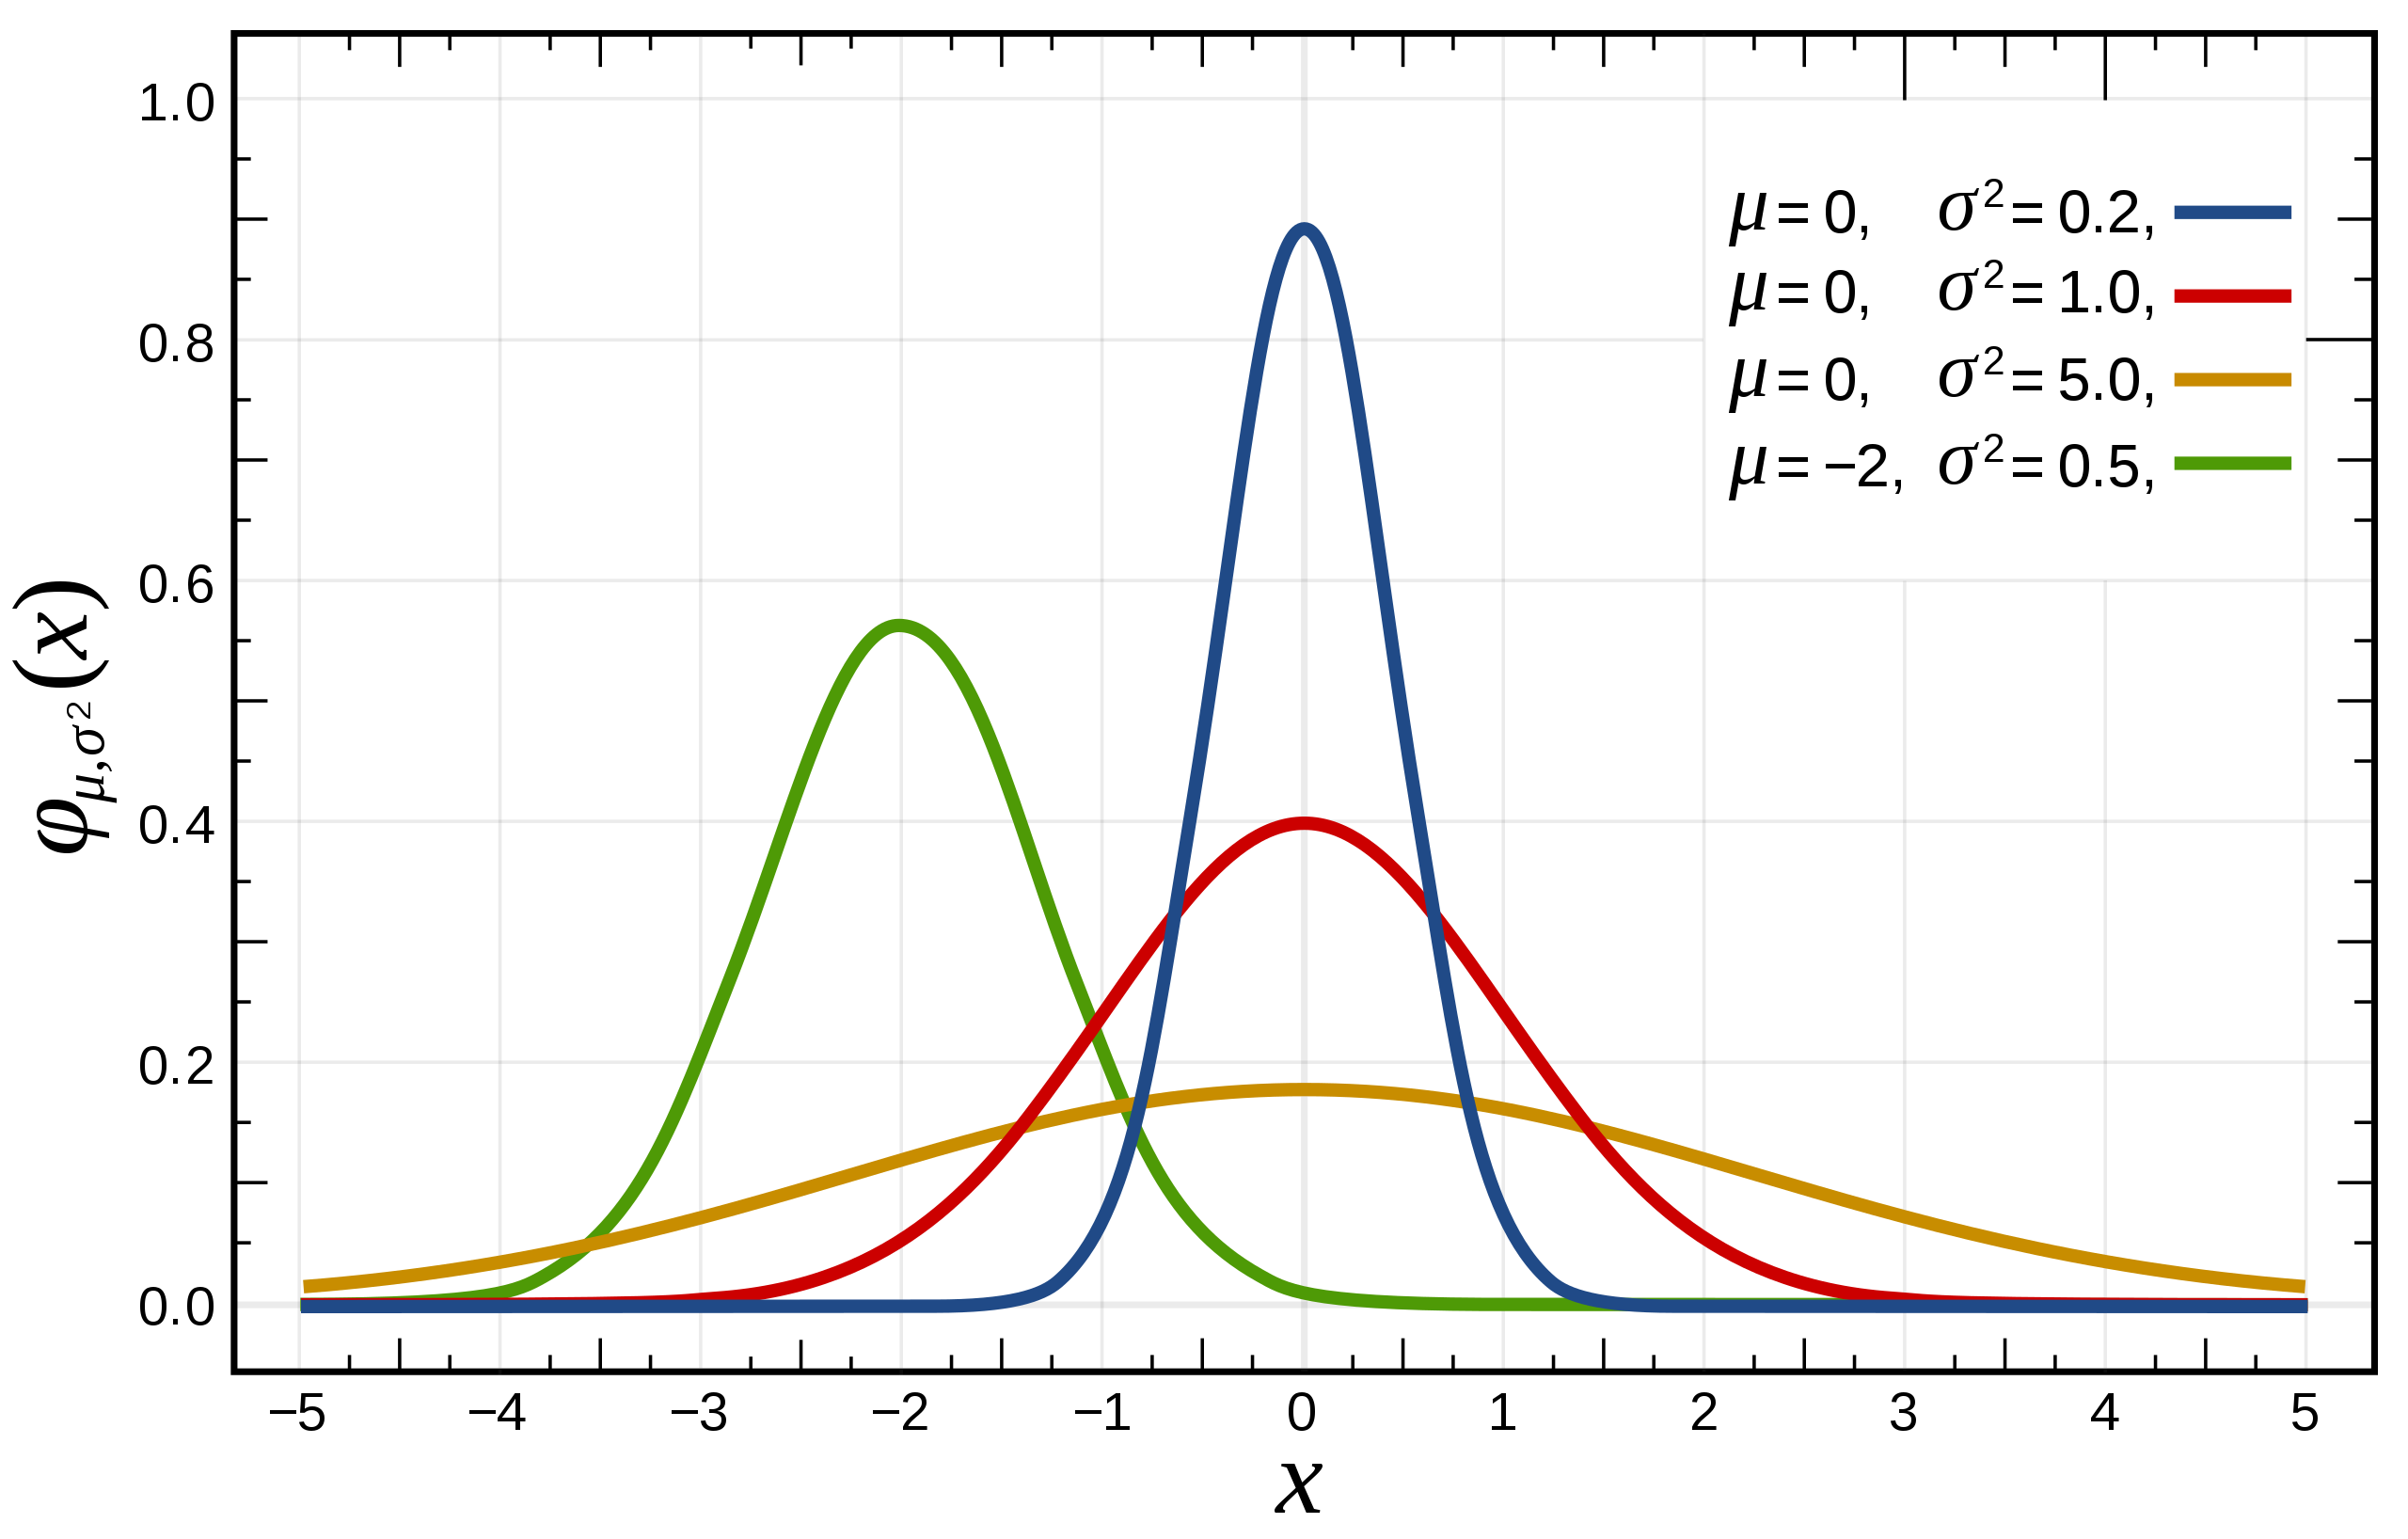

Cauchy distribution:
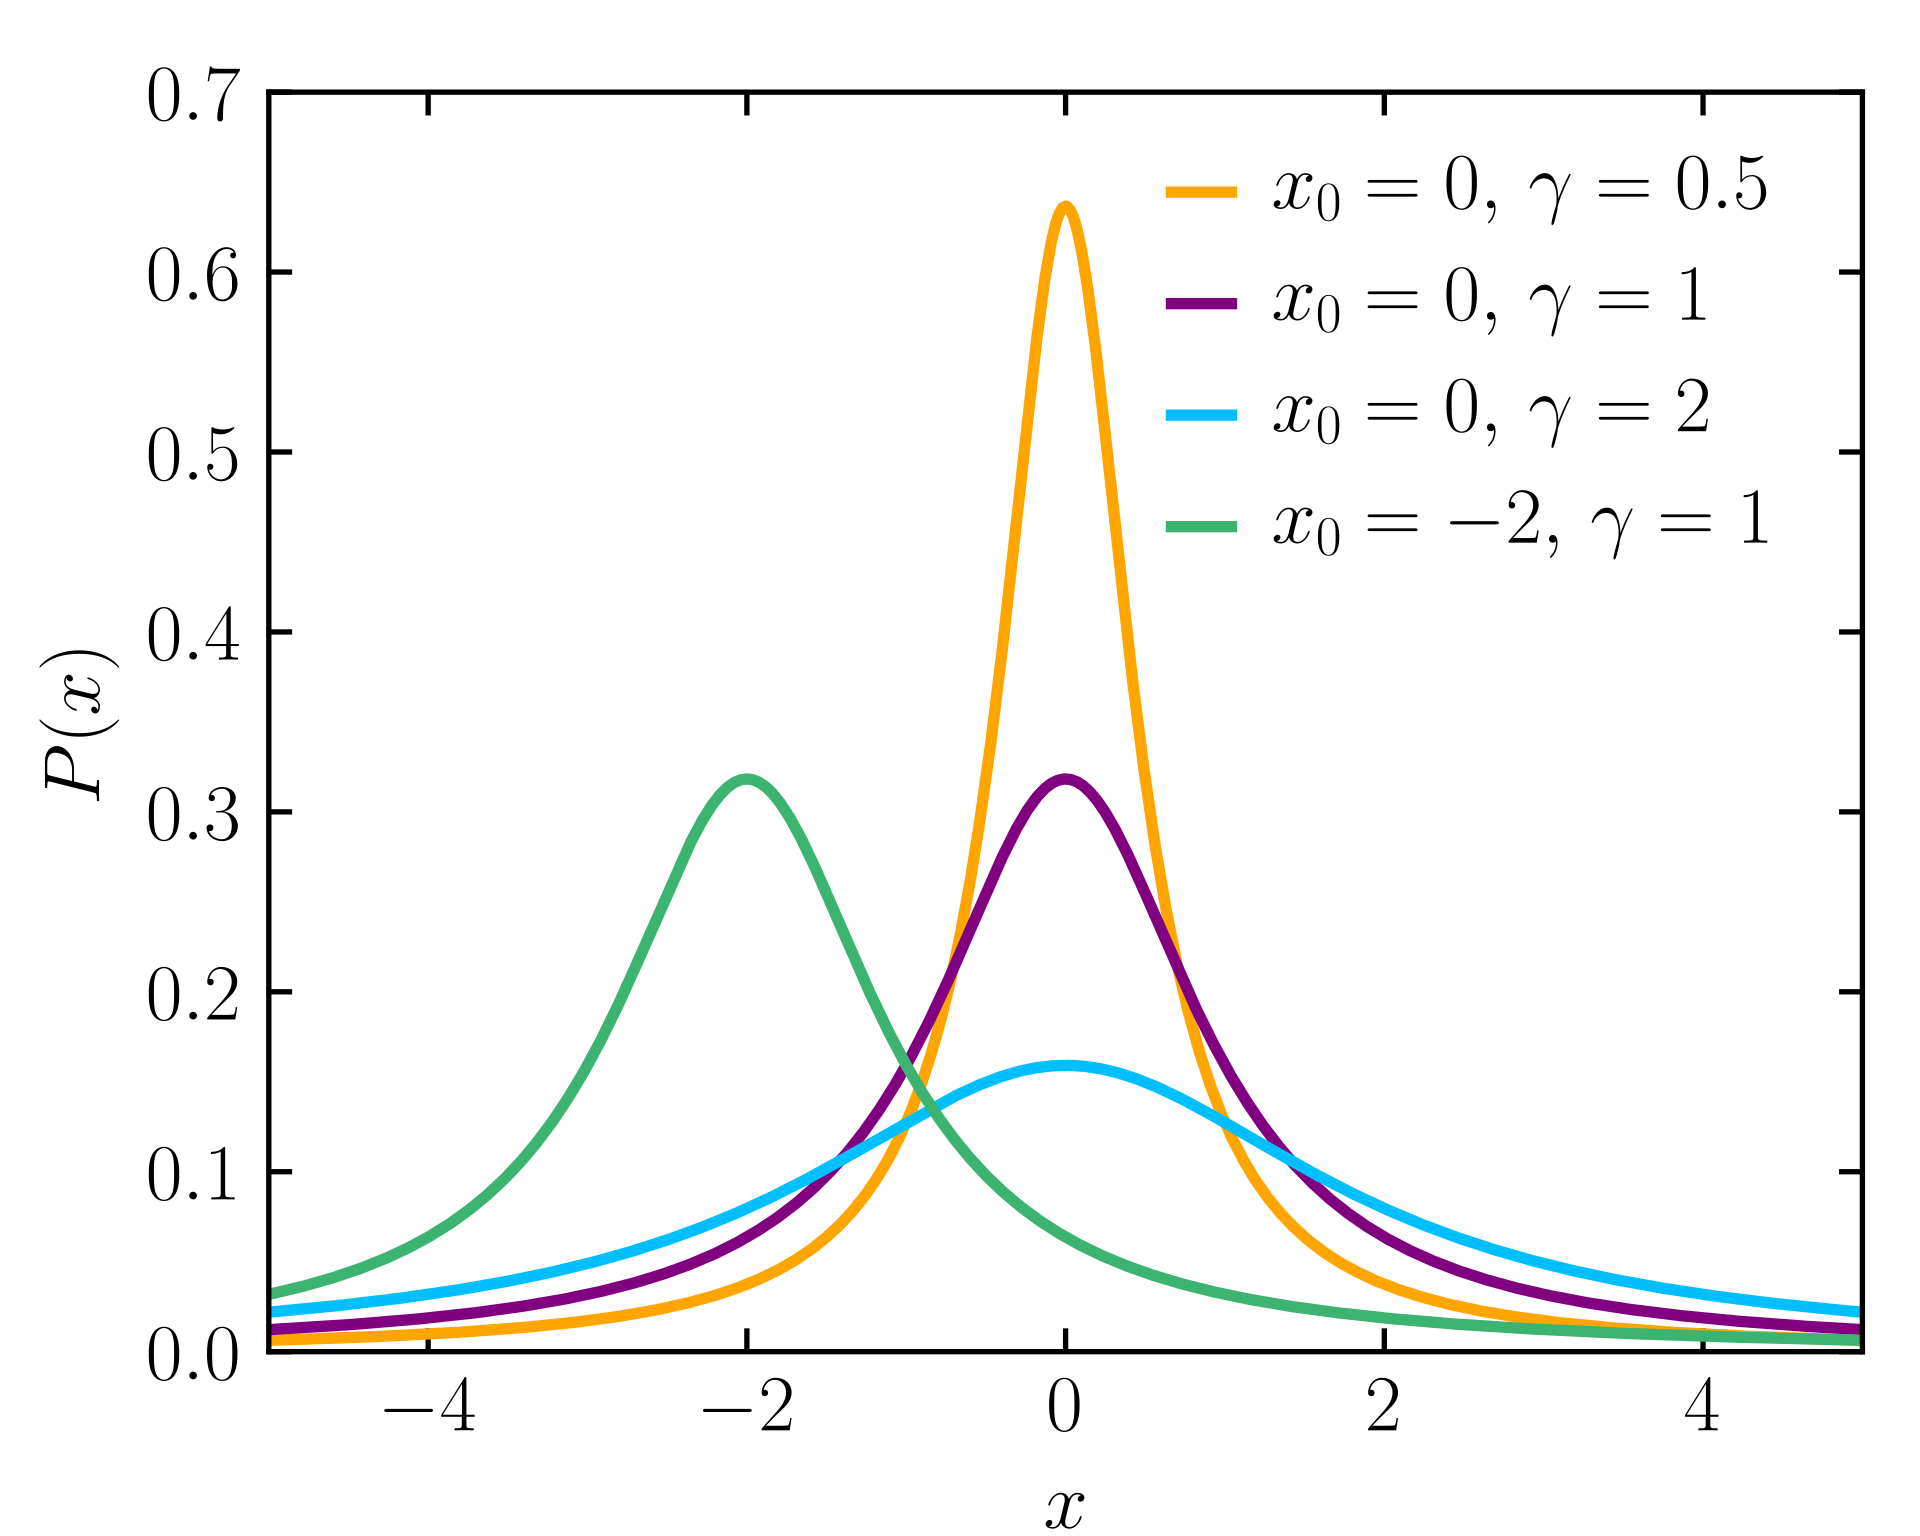

In [ ]:
hist(rnorm(1000000))

In [ ]:
hist(rcauchy(1000000))

### Central limit theorem revisited

In [ ]:
draws = rnorm(10000, 2, 2)
means = c()
for (ii in 1:10000)
    means = c(means, mean(draws[1:ii]))
plot(means)

In [ ]:
draws = rcauchy(10000, 2, 2)
means = c()
for (ii in 1:10000)
    means = c(means, mean(draws[1:ii]))
plot(means)

# Feedback to long-tails

Roe & Baker (2007)

In [ ]:
deltaT0 = 1.2 # C

In [ ]:
ff = rnorm(1000000, .62, .1)

In [ ]:
plot(density(ff))

In [ ]:
deltaT = deltaT0 / (1 - ff)

In [ ]:
plot(density(deltaT))

In [ ]:
plot(density(deltaT), xlim=c(0, 20))

In [ ]:
plot(density(deltaT, from=0, to=14))

## A little information theory

Entropy is a measure of how much information is gained when you find out the value of a random variable. It depends on the probability distribution of the random variable. The equation is:
$$H(X) = -\sum_x p(x) \log_2{p(x)}$$

### Example: a weighted coin

The coin can take 2 possible values: Heads or Tails. An evenly weighted coin has a probability of 0.5 for each outcome. But the probability of the outcomes could be different.

In [ ]:
# Evenly weighted coin:
-(.5 * log2(.5) + .5 * log2(.5))

That is 1 bit of information.

In [ ]:
# Extremely weighted coin:
-(0.001 * log2(0.001) + 0.999 * log2(0.999))

Almost no information: we already knew the answer beforehand.

In [ ]:
pheads = seq(0, 1, length.out=100)
entropy = -(pheads * log2(pheads) + (1 - pheads) * log2(1 - pheads))
plot(pheads, entropy)

## Entropy of English

### Model 1: all letters are equally weighted

In [ ]:
-(26 * ((1 / 26) * log2(1 / 26)))

### Model 2: Let's measure the actual likelihood of letters!

In [ ]:
data = readChar("~/groups/complexsysanalysis/week4/carroll-alice.txt", 144395)

In [ ]:
data = tolower(data)

In [ ]:
substring(data, 1, 20)

In [ ]:
letters

In [ ]:
install.packages("stringr")
library(stringr)

In [ ]:
str_count(data, "a")

In [ ]:
counts = c()
for (letter in letters) {
    counts = c(counts, str_count(data, letter))
}

In [ ]:
probs = counts / sum(counts)

In [ ]:
-sum(probs * log2(probs))

In [ ]:
counts = c()
for (letter1 in letters) {
  for (letter2 in letters)
    counts = c(counts, str_count(data, paste0(letter1, letter2)))
}

In [ ]:
probs = counts / sum(counts)
probs[probs == 0] = NA

In [ ]:
-sum(probs * log2(probs), na.rm=T) / 2

In [ ]:
counts = c()
for (letter1 in letters) {
  for (letter2 in letters)
    for (letter3 in letters)
      counts = c(counts, str_count(data, paste0(letter1, letter2, letter3)))
}

In [ ]:
probs = counts / sum(counts)
probs[probs == 0] = NA
-sum(probs * log2(probs), na.rm=T) / 3